### Import module

In [1]:
from deepface import DeepFace
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd

### Select models

In [2]:
models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "DeepID", "Dlib", "ArcFace"]

In [13]:
img1 = "Image/Kevin Ilpallazo.jpg" 

In [14]:
image = DeepFace.detectFace(img1)

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.


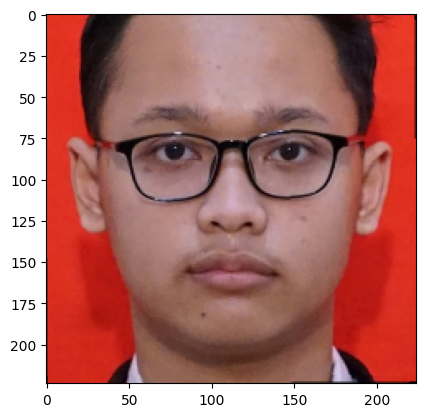

In [15]:
plt.imshow(image)

In [16]:
df = DeepFace.find(img_path=img1, db_path = 'image/', model_name = models[0], enforce_detection=False)

There are  2  representations found in  representations_vgg_face.pkl
find function lasts  0.3797023296356201  seconds


In [17]:
df

[Empty DataFrame
 Columns: [identity, source_x, source_y, source_w, source_h, VGG-Face_cosine]
 Index: []]

In [8]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [9]:
images = load_images_from_folder("image/")

In [10]:
images

[array([[[ 40,  61, 236],
         [ 39,  60, 235],
         [ 40,  61, 236],
         ...,
         [ 46,  67, 242],
         [ 46,  67, 242],
         [ 45,  66, 241]],
 
        [[ 42,  63, 238],
         [ 41,  62, 237],
         [ 42,  63, 238],
         ...,
         [ 46,  67, 242],
         [ 46,  67, 242],
         [ 46,  67, 242]],
 
        [[ 42,  63, 238],
         [ 43,  64, 239],
         [ 43,  64, 239],
         ...,
         [ 46,  67, 242],
         [ 46,  67, 242],
         [ 46,  67, 242]],
 
        ...,
 
        [[110,  83,  69],
         [117,  90,  76],
         [119,  92,  78],
         ...,
         [122,  94,  77],
         [141, 113,  96],
         [182, 152, 135]],
 
        [[138, 111,  97],
         [122,  95,  81],
         [100,  73,  59],
         ...,
         [175, 147, 130],
         [202, 174, 157],
         [213, 183, 166]],
 
        [[200, 173, 159],
         [181, 154, 140],
         [160, 133, 119],
         ...,
         [214, 186, 169],
  

In [11]:
def verify(img1_path,img2_path, model_name):
    img1= cv2.imread(img1_path)
    img2= cv2.imread(img2_path)

    plt.imshow(img1[:,:,::-1])
    plt.show()
    plt.imshow(img2[:,:,::-1])
    plt.show()

    output = DeepFace.verify(img1_path,img2_path, model_name=model_name)
    print(output)

    verification = output['verified']

    if verification:
        print('Benar')
    else:
        print('Salah')

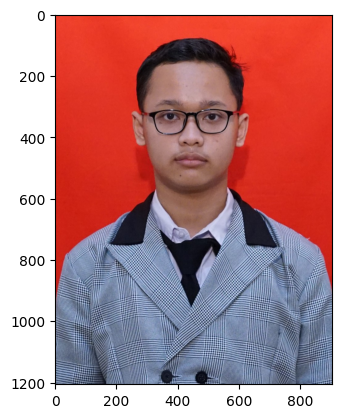

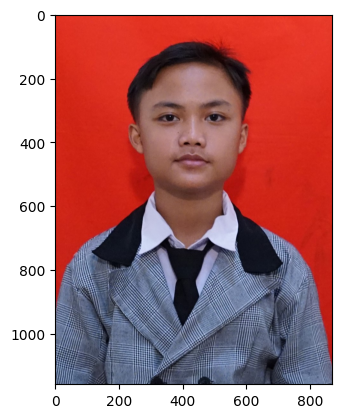

{'verified': True, 'distance': 0.30069973477665757, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 224, 'y': 171, 'w': 436, 'h': 436}, 'img2': {'x': 222, 'y': 159, 'w': 405, 'h': 405}}, 'time': 0.71}
Benar


In [12]:
verify("image/Kevin Ilpallazo.jpg","image/Malik Arifbyllah.jpg", model_name = models[0])